In [1]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns',100)
import matplotlib.pyplot as plt
import matplotlib as mat
%matplotlib inline
import seaborn as sns

In [2]:
cmap = sns.cubehelix_palette(light=1, as_cmap=True)

In [3]:
from google.colab import files
uploaded = files.upload()

Saving ITsalary.csv to ITsalary.csv


In [60]:
data = pd.read_csv('ITsalary.csv')
data.head()

Timestamp   Age Gender    City           Position   \
0  24/11/2020 11:14:15  26.0   Male  Munich   Software Engineer   
1  24/11/2020 11:14:16  26.0   Male  Berlin   Backend Developer   
2  24/11/2020 11:14:21  29.0   Male  Berlin   Software Engineer   
3  24/11/2020 11:15:24  28.0   Male  Berlin  Frontend Developer   
4  24/11/2020 11:15:46  37.0   Male  Berlin   Backend Developer   

  Total years of experience Years of experience in Germany Seniority level  \
0                         5                              3          Senior   
1                         7                              4          Senior   
2                        12                              6            Lead   
3                         4                              1          Junior   
4                        17                              6          Senior   

  Your main technology / programming language  \
0                                  TypeScript   
1                                        Ruby   
2                     Javascript / Typescript   
3                                  Javascript   
4                                     C# .NET   

  Other technologies/programming languages you use often  \
0                    Kotlin, Javascript / Typescript       
1                                                NaN       
2                    Javascript / Typescript, Docker       
3                                                NaN       
4                             .NET, SQL, AWS, Docker       

   Yearly brutto salary (without bonus and stocks) in EUR  \
0                                            80000.0        
1                                            80000.0        
2                                           120000.0        
3                                            54000.0        
4                                            62000.0        

  Yearly bonus + stocks in EUR  \
0                         5000   
1                          NaN   
2                       120000   
3                          NaN   
4                          NaN   

   Annual brutto salary (without bonus and stocks) one year ago. Only answer if staying in the same country  \
0                                            75000.0                                                          
1                                            82000.0                                                          
2                                           100000.0                                                          
3                                                NaN                                                          
4                                            62000.0                                                          

  Annual bonus+stocks one year ago. Only answer if staying in same country  \
0                                              10000                         
1                                               5000                         
2                                             100000                         
3                                                NaN                         
4                                                NaN                         

  Number of vacation days           Employment status   Сontract duration  \
0                      30          Full-time employee  Unlimited contract   
1                      28          Full-time employee  Unlimited contract   
2                      30  Self-employed (freelancer)  Temporary contract   
3                      24          Full-time employee  Unlimited contract   
4                      29          Full-time employee  Unlimited contract   

  Main language at work Company size Company type  \
0               English       51-100      Product   
1               English     101-1000      Product   
2               English     101-1000      Product   
3               English       51-100      Startup   
4               English     101-1000      Product

# Basic Exploration

In [61]:
# Shape of the data
print("Dataset contains {} rows and {} columns.".format(data.shape[0], data.shape[1]))

Dataset contains 1253 rows and 23 columns.


In [62]:
#data=(data-data.mean())/data.std()

In [63]:
# A little bit of data cleaning to have the column names more readable
columns = data.columns.tolist()
columns

['Timestamp',
 'Age',
 'Gender',
 'City',
 'Position ',
 'Total years of experience',
 'Years of experience in Germany',
 'Seniority level',
 'Your main technology / programming language',
 'Other technologies/programming languages you use often',
 'Yearly brutto salary (without bonus and stocks) in EUR',
 'Yearly bonus + stocks in EUR',
 'Annual brutto salary (without bonus and stocks) one year ago. Only answer if staying in the same country',
 'Annual bonus+stocks one year ago. Only answer if staying in same country',
 'Number of vacation days',
 'Employment status',
 'Сontract duration',
 'Main language at work',
 'Company size',
 'Company type',
 'Have you lost your job due to the coronavirus outbreak?',
 'Have you been forced to have a shorter working week (Kurzarbeit)? If yes, how many hours per week',
 'Have you received additional monetary support from your employer due to Work From Home? If yes, how much in 2020 in EUR']

In [64]:
new_column_names= ['Timestamp','Age','Gender','City','Position','TotalYearsExperience', 'YearsExperienceGermany', 'Seniority', 'MainSkill', 
                   'SecondarySkills', 'BrutSalary', 'BrutSalaryAndStocks',
                   'AnnualBrutLastYear', 'AnnualBrutAndStocksLastYear', 'VacationDays', 'Employment', 'ContractDuration', 'MainLanguage', 'CompanySize',
                   'CompanyType', 'LossOfJobCorona', 'HoursIfShorterWeek', 'AdditionalMonetarySupport']

for i, column in enumerate(columns):
  name = column.split(" ")
  if len(name) >1:
    columns[i] = new_column_names[i]

data.set_axis(columns, axis=1,inplace=True)
data.head(1)

Timestamp   Age Gender    City           Position  \
0  24/11/2020 11:14:15  26.0   Male  Munich  Software Engineer   

  TotalYearsExperience YearsExperienceGermany Seniority   MainSkill  \
0                    5                      3    Senior  TypeScript   

                   SecondarySkills  BrutSalary BrutSalaryAndStocks  \
0  Kotlin, Javascript / Typescript     80000.0                5000   

   AnnualBrutLastYear AnnualBrutAndStocksLastYear VacationDays  \
0             75000.0                       10000           30   

           Employment    ContractDuration MainLanguage CompanySize  \
0  Full-time employee  Unlimited contract      English      51-100   

  CompanyType LossOfJobCorona  HoursIfShorterWeek AdditionalMonetarySupport  
0     Product              No                 NaN                       NaN

In [65]:
# Because we know the dataset is focused on Germany data, we can get rid of the City, and main language; Timestamp is also not helpful
data = data.drop(['Timestamp', 'City', 'MainLanguage'], axis=1)

In [66]:
# Seeing how many empty values each column has
data.isnull().sum()

Age                             27
Gender                          10
Position                         6
TotalYearsExperience            16
YearsExperienceGermany          32
Seniority                       12
MainSkill                      127
SecondarySkills                157
BrutSalary                       0
BrutSalaryAndStocks            424
AnnualBrutLastYear             368
AnnualBrutAndStocksLastYear    639
VacationDays                    68
Employment                      17
ContractDuration                29
CompanySize                     18
CompanyType                     25
LossOfJobCorona                 20
HoursIfShorterWeek             880
AdditionalMonetarySupport      791
dtype: int64

In [67]:
# Checking for duplicate rows
data.duplicated().any()

True

In [68]:
# Data types
data.dtypes

Age                            float64
Gender                          object
Position                        object
TotalYearsExperience            object
YearsExperienceGermany          object
Seniority                       object
MainSkill                       object
SecondarySkills                 object
BrutSalary                     float64
BrutSalaryAndStocks             object
AnnualBrutLastYear             float64
AnnualBrutAndStocksLastYear     object
VacationDays                    object
Employment                      object
ContractDuration                object
CompanySize                     object
CompanyType                     object
LossOfJobCorona                 object
HoursIfShorterWeek             float64
AdditionalMonetarySupport       object
dtype: object

In [69]:
def columnToFloat(columnName):                  # convert columns from object to floats
  indexes = []
  for index,row in data.iterrows():
    #if type(row[columnName]) == str:
      try:
        #row[columnName] = float(row[columnName])
        data[columnName][index] = float(data[columnName][index])
      except:
        indexes.append(index)
  return indexes

# Delete rows with wrong entries
rows_to_delete = []
rows_to_delete = (rows_to_delete + columnToFloat('TotalYearsExperience') +columnToFloat('YearsExperienceGermany') + columnToFloat('AdditionalMonetarySupport')
                  + columnToFloat('BrutSalaryAndStocks') + columnToFloat('AnnualBrutAndStocksLastYear') + columnToFloat('HoursIfShorterWeek'))
rows_to_delete_unique = list(set(rows_to_delete))
rows_to_delete_unique =  sorted(rows_to_delete_unique)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [70]:
data.drop(rows_to_delete_unique, axis=0, inplace=True)
data = data.reset_index(drop=True)

In [71]:
data['TotalYearsExperience']        = data['TotalYearsExperience'].astype(float)
data['YearsExperienceGermany']      = data['YearsExperienceGermany'].astype(float)
data['AdditionalMonetarySupport']   = data['AdditionalMonetarySupport'].astype(float)
data['BrutSalaryAndStocks']         = data['BrutSalaryAndStocks'].astype(float)
data['AnnualBrutAndStocksLastYear'] = data['AnnualBrutAndStocksLastYear'].astype(float)
data['HoursIfShorterWeek']          = data['HoursIfShorterWeek'].astype(float)

In [72]:
# Change zeros with most occuring values for text data, with mean for numerical data and with median for anything related to money
data = data.fillna({'Age': data['Age'].mean(), 'Gender': data['Gender'].mode(), 'Position': data['Position'].mode(), 'TotalYearsExperience' : data['TotalYearsExperience'].mean(),
             'YearsExperienceGermany': data['YearsExperienceGermany'].mean(), 'Seniority': data['Seniority'].mode(), 'MainSkill' : data['MainSkill'].mode(),
             'SecondarySkills': data['SecondarySkills'].mode(), 'BrutSalaryAndStocks': data['BrutSalaryAndStocks'].median(), 'AnnualBrutLastYear': data['AnnualBrutLastYear'].median(),
             'AnnualBrutAndStocksLastYear': data['AnnualBrutAndStocksLastYear'].median(), 'VacationDays': data['VacationDays'].mode(), 'Employment': data['Employment'].mode(),
             'ContractDuration': data['ContractDuration'].mode(), 'CompanySize': data['CompanySize'].mode(),
             'CompanyType': data['CompanyType'].mode(), 'LossOfJobCorona': data['LossOfJobCorona'].mode(), 'HoursIfShorterWeek': data['HoursIfShorterWeek'].mean(), 
             'AdditionalMonetarySupport': data['AdditionalMonetarySupport'].median()})

data.sample(3)

Age  Gender                    Position  TotalYearsExperience  \
1141  26.0    Male            Mobile Developer                   5.0   
603   35.0    Male                Data Analyst                   9.0   
502   29.0  Female  Software Developer in Test                   9.0   

      YearsExperienceGermany Seniority MainSkill  \
1141                     1.0    Middle    Kotlin   
603                      9.0    Senior    Python   
502                      4.0      Lead      Java   

                           SecondarySkills  BrutSalary  BrutSalaryAndStocks  \
1141                  Kotlin, Java / Scala     65000.0                  0.0   
603   Python, SQL, AWS, Kubernetes, Docker     77000.0                  0.0   
502   Javascript / Typescript, SQL, Docker     66000.0                  0.0   

      AnnualBrutLastYear  AnnualBrutAndStocksLastYear VacationDays  \
1141             65000.0                       5000.0           24   
603              70000.0                          0.0           28   
502              60000.0                          0.0           25   

              Employment    ContractDuration CompanySize CompanyType  \
1141  Full-time employee  Unlimited contract      51-100     Startup   
603   Full-time employee  Unlimited contract    101-1000     Startup   
502   Full-time employee  Unlimited contract    101-1000     Startup   

     LossOfJobCorona  HoursIfShorterWeek  AdditionalMonetarySupport  
1141              No           13.566568                      250.0  
603               No           13.566568                      250.0  
502               No           13.566568                      250.0

In [73]:
# Shape of clean(er) cdata
print("After cleaning, the dataset now contains {} rows and {} columns.".format(data.shape[0], data.shape[1]))

After cleaning, the dataset now contains 1171 rows and 20 columns.


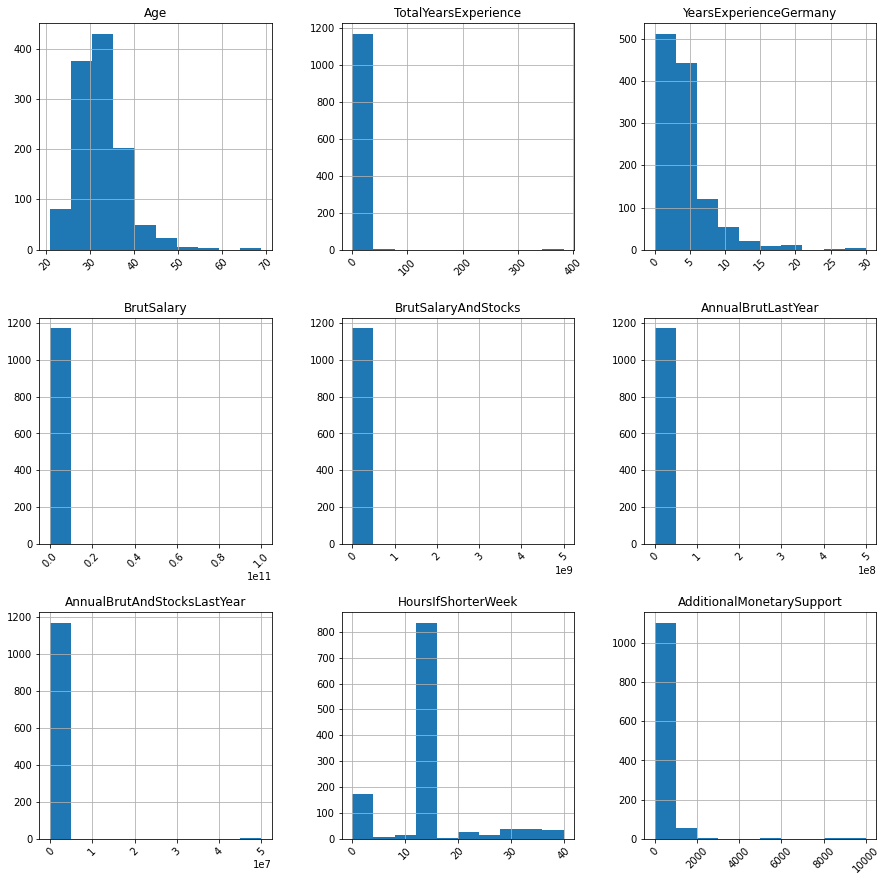

In [74]:
# Variable distributions
data.hist(figsize=(15,15), xrot=45)
plt.show()

In [75]:
# We can see from the plots that some columns have points which can be suspected as outliers
print("The largest value in the annual salary category is {}".format(data['AnnualBrutLastYear'].max()))
print("The largest value in the experience is {}".format(data['TotalYearsExperience'].max()))
print("The largest value in the Additional Monetary Support category is {}.".format(data['AdditionalMonetarySupport'].max()))

The largest value in the annual salary category is 500000000.0
The largest value in the experience is 383.0
The largest value in the Additional Monetary Support category is 10000.0.


In [76]:
# Stats for each variable
data.describe()

Age  TotalYearsExperience  YearsExperienceGermany  \
count  1171.000000           1171.000000             1171.000000   
mean     32.568935              9.199654                3.753070   
std       5.551550             12.115345                3.594813   
min      21.000000              0.000000                0.000000   
25%      29.000000              5.000000                1.500000   
50%      32.000000              8.000000                3.000000   
75%      35.000000             12.000000                5.000000   
max      69.000000            383.000000               30.000000   

         BrutSalary  BrutSalaryAndStocks  AnnualBrutLastYear  \
count  1.171000e+03         1.171000e+03        1.171000e+03   
mean   8.589597e+07         4.285924e+06        4.936801e+05   
std    2.922300e+09         1.461134e+08        1.460946e+07   
min    1.016400e+04         0.000000e+00        1.100000e+04   
25%    6.000000e+04         2.200000e+03        6.000000e+04   
50%    7.000000e+04         5.000000e+03        6.500000e+04   
75%    8.000000e+04         9.000000e+03        7.200000e+04   
max    1.000000e+11         5.000000e+09        5.000000e+08   

       AnnualBrutAndStocksLastYear  HoursIfShorterWeek  \
count                 1.171000e+03         1171.000000   
mean                  5.594089e+04           13.566568   
std                   1.460968e+06            8.262817   
min                   0.000000e+00            0.000000   
25%                   5.000000e+03           13.566568   
50%                   5.000000e+03           13.566568   
75%                   5.000000e+03           13.566568   
max                   5.000000e+07           40.000000   

       AdditionalMonetarySupport  
count                1171.000000  
mean                  328.434919  
std                   520.475434  
min                     0.000000  
25%                   250.000000  
50%                   250.000000  
75%                   250.000000  
max                 10000.000000

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


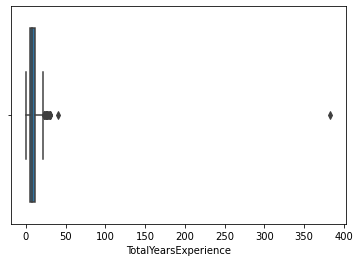

The max value in the Total Years of Experience is 383.0


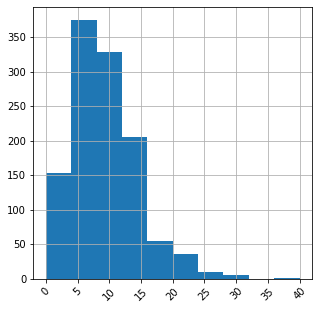

In [77]:
# Let's clean the experience column of outliers
sns.boxplot(data['TotalYearsExperience'])
plt.show()

print('The max value in the Total Years of Experience is {}'.format(data['TotalYearsExperience'].max()))

# Deleting outliers
data.drop(data[data['TotalYearsExperience']>40].index.tolist(), axis=0, inplace=True)
data = data.reset_index(drop=True)

# Plotting the experience column again
data['TotalYearsExperience'].hist(figsize=(5,5), xrot=45)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


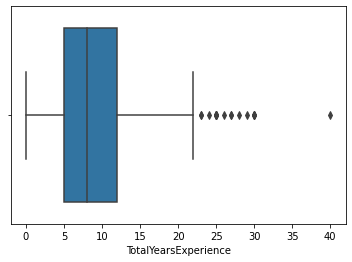

In [78]:
sns.boxplot(data['TotalYearsExperience'])
plt.show()

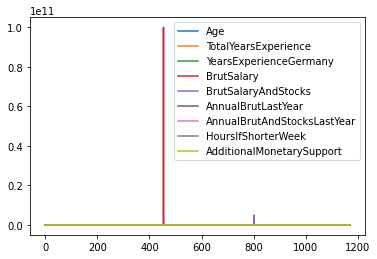

In [79]:
data.plot()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


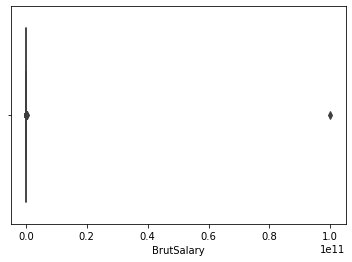

The max value in the Brut Salary column is 99999999999.0


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


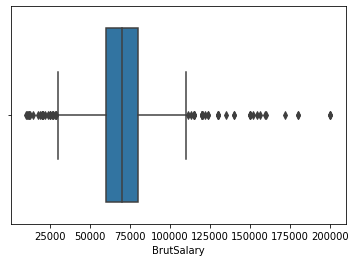

In [80]:
# Salary column is skweing our visualizations
sns.boxplot(data['BrutSalary'])
plt.show()

print("The max value in the Brut Salary column is {}".format(data['BrutSalary'].max()))

data.drop(data[data['BrutSalary']> 200000].index.tolist(), axis=0, inplace=True)
data = data.reset_index(drop=True)

sns.boxplot(data['BrutSalary'])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


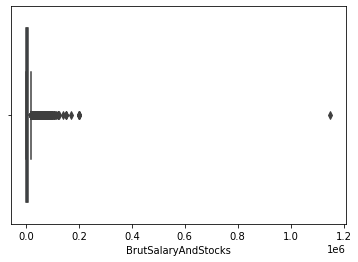

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


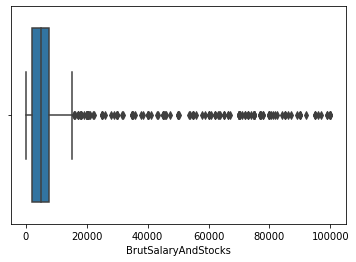

In [81]:
sns.boxplot(data['BrutSalaryAndStocks'])
plt.show()

data.drop(data[data['BrutSalaryAndStocks']> 100000].index.tolist(), axis=0, inplace=True)
data = data.reset_index(drop=True)

sns.boxplot(data['BrutSalaryAndStocks'])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


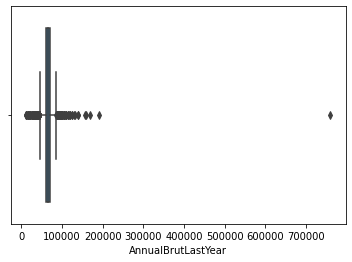

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


The max value in the Annual Brut Last Year column is 760000.0


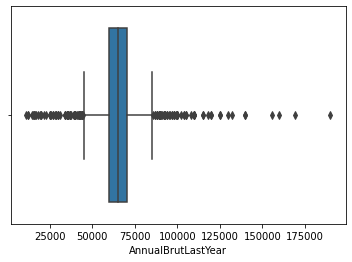

In [82]:
sns.boxplot(data['AnnualBrutLastYear'])
plt.show()

print("The max value in the Annual Brut Last Year column is {}".format(data['AnnualBrutLastYear'].max()))

data.drop(data[data['AnnualBrutLastYear']> 200000].index.tolist(), axis=0, inplace=True)
data = data.reset_index(drop=True)

sns.boxplot(data['AnnualBrutLastYear'])
plt.show()

Age Gender           Position  TotalYearsExperience  \
359  32.568935   Male  Backend Developer                   8.0   

     YearsExperienceGermany Seniority MainSkill  \
359                     8.0      Lead    Python   

                                       SecondarySkills  BrutSalary  \
359  Python, C/C++, Javascript / Typescript, Java /...     65000.0   

     BrutSalaryAndStocks  AnnualBrutLastYear  AnnualBrutAndStocksLastYear  \
359               5400.0             70400.0                       5400.0   

    VacationDays          Employment    ContractDuration CompanySize  \
359           29  Part-time employee  Unlimited contract    up to 10   

    CompanyType LossOfJobCorona  HoursIfShorterWeek  AdditionalMonetarySupport  
359     Product              No                39.0                    10000.0

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


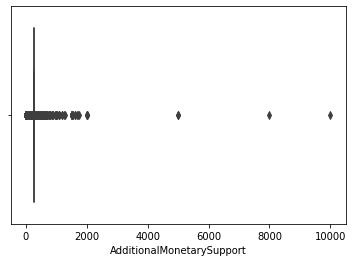

The max value in the Annual Brut Last Year column is 10000.0


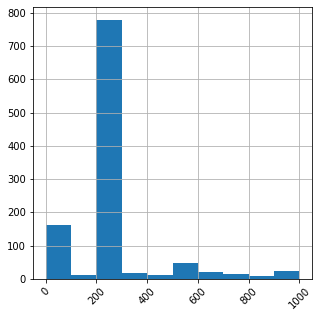

In [83]:
# Let's check another outlier- in monetary support. Did someone fill this in from the perspective of a company owner?
display(data[data['AdditionalMonetarySupport'] == 10000])

sns.boxplot(data['AdditionalMonetarySupport'])
plt.show()

print("The max value in the Annual Brut Last Year column is {}".format(data['AdditionalMonetarySupport'].max()))

data.drop(data[data['AdditionalMonetarySupport']> 1000].index.tolist(), axis=0, inplace=True)
data = data.reset_index(drop=True)

data['AdditionalMonetarySupport'].hist(figsize=(5,5), xrot=45)
plt.show()

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f1a5dccc750>,
      dtype=object)

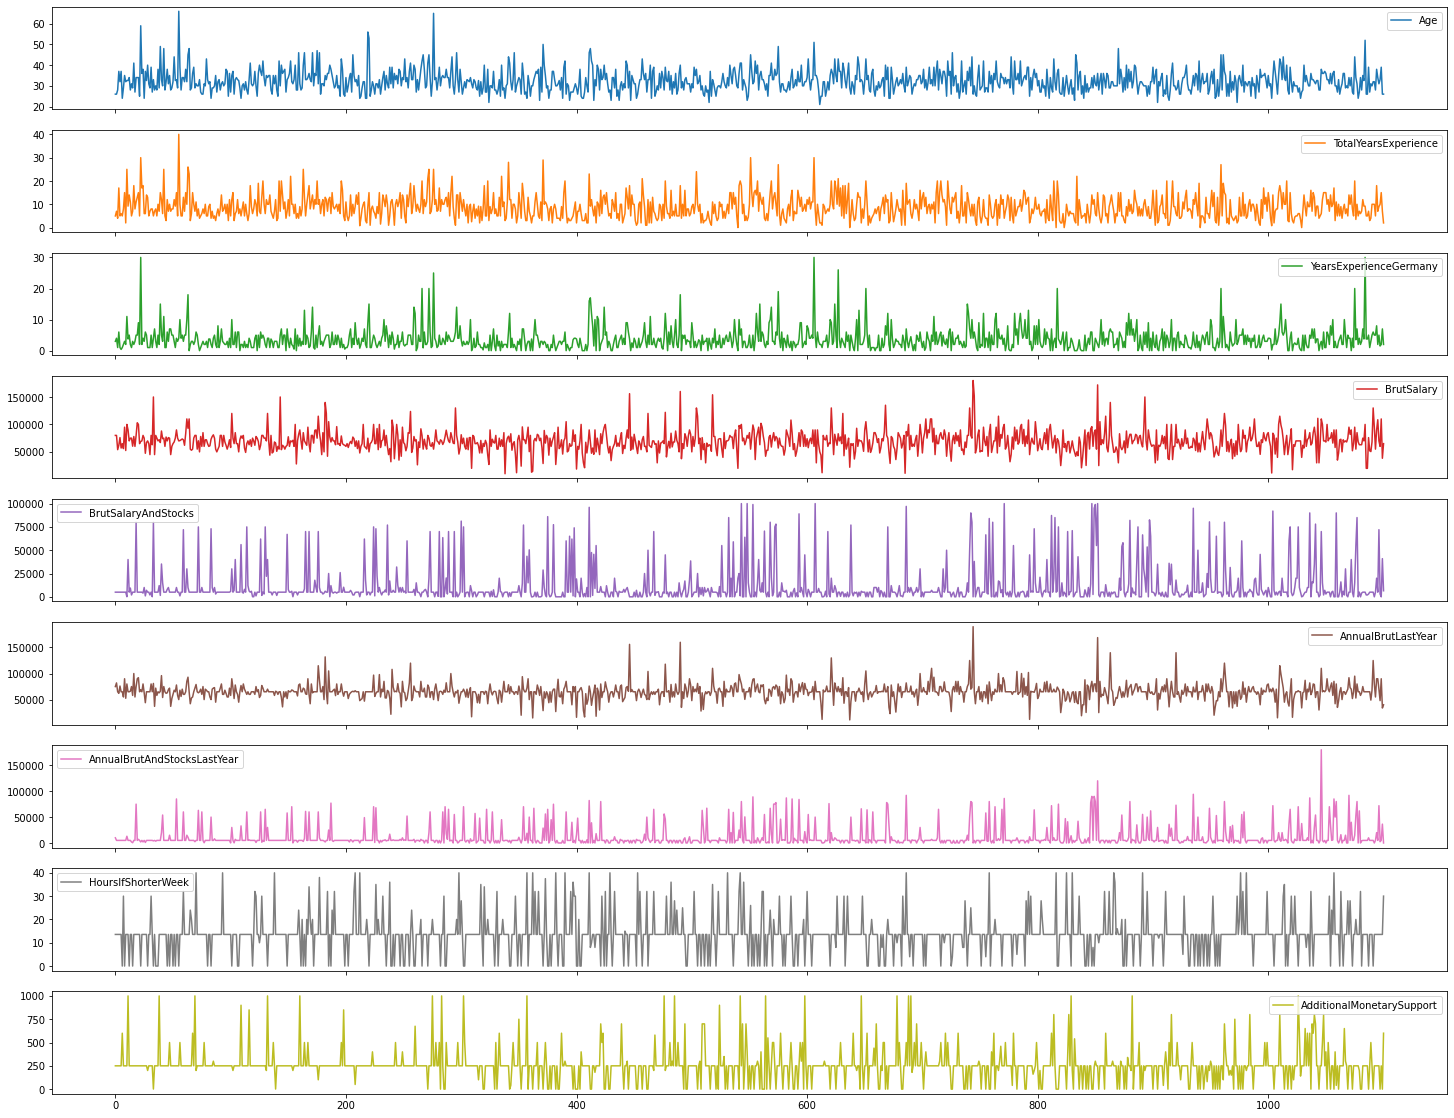

In [84]:
data.plot(subplots=True, figsize=(25, 20))

Age                               AxesSubplot(0.125,0.125;0.0731132x0.755)
TotalYearsExperience           AxesSubplot(0.212736,0.125;0.0731132x0.755)
YearsExperienceGermany         AxesSubplot(0.300472,0.125;0.0731132x0.755)
BrutSalary                     AxesSubplot(0.388208,0.125;0.0731132x0.755)
BrutSalaryAndStocks            AxesSubplot(0.475943,0.125;0.0731132x0.755)
AnnualBrutLastYear             AxesSubplot(0.563679,0.125;0.0731132x0.755)
AnnualBrutAndStocksLastYear    AxesSubplot(0.651415,0.125;0.0731132x0.755)
HoursIfShorterWeek             AxesSubplot(0.739151,0.125;0.0731132x0.755)
AdditionalMonetarySupport      AxesSubplot(0.826887,0.125;0.0731132x0.755)
dtype: object

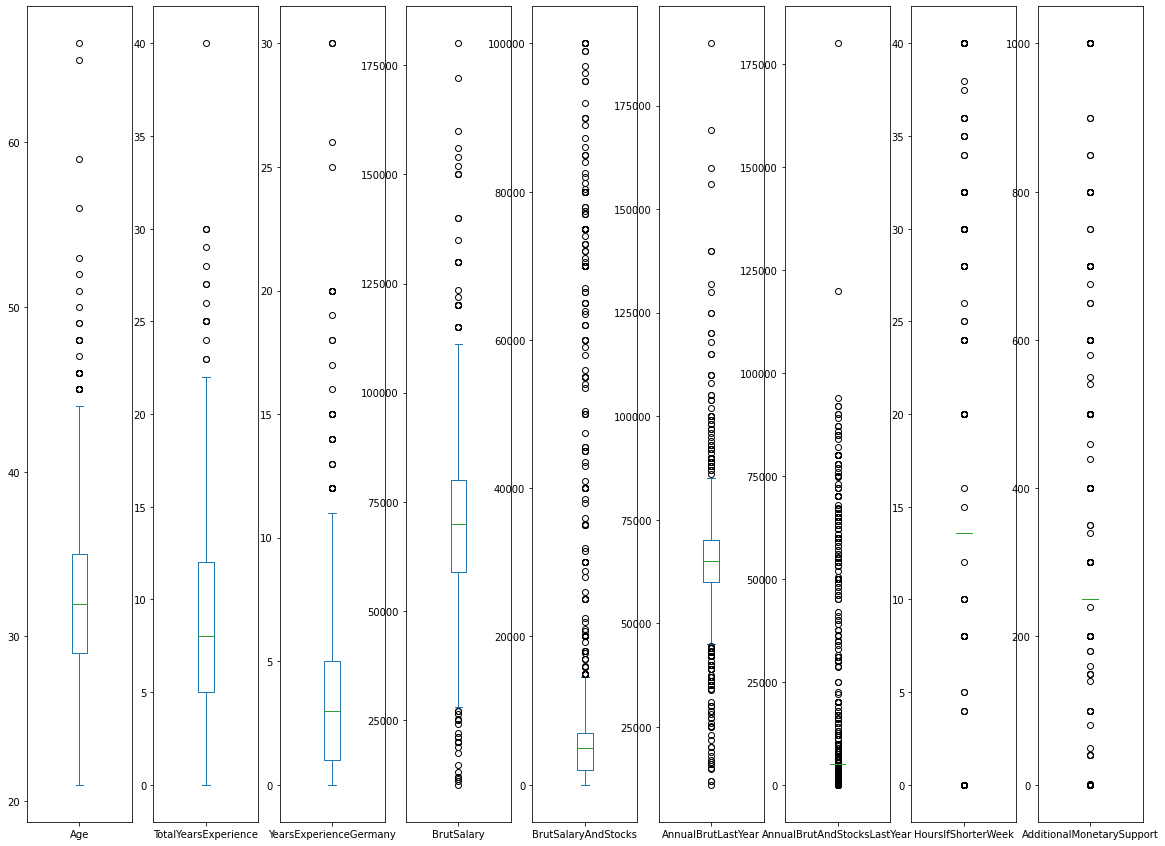

In [85]:
data.plot.box(subplots = True, figsize=(20, 15))

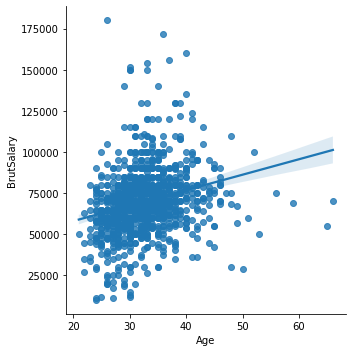

In [86]:
sns.lmplot(x='Age', y = 'BrutSalary',  data=data ,fit_reg=True) 

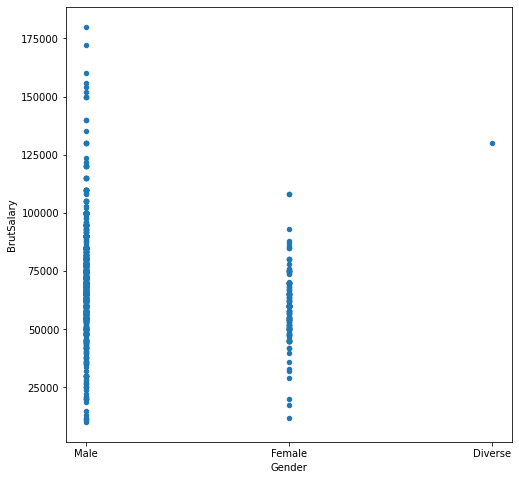

In [87]:
for i,x in data.iterrows():
  if type(x['Gender']) == float:
    data.drop(i, inplace = True)


data.plot.scatter(x='Gender', y='BrutSalary', figsize = (8,8))

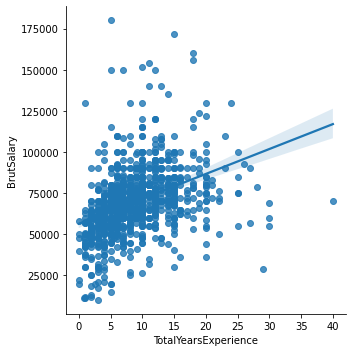

In [88]:
sns.lmplot(x='TotalYearsExperience', y = 'BrutSalary',  data=data ,fit_reg=True) 

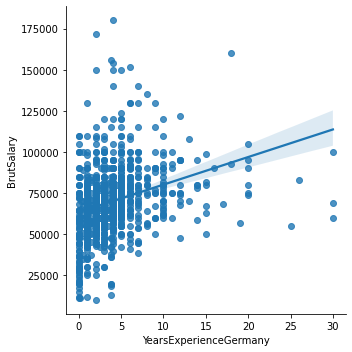

In [89]:
sns.lmplot(x='YearsExperienceGermany', y = 'BrutSalary',  data=data ,fit_reg=True) 

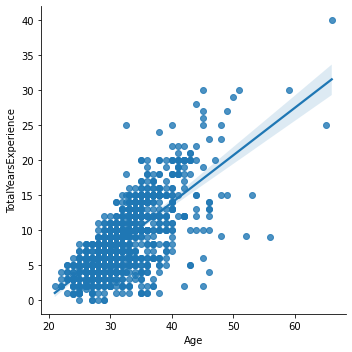

In [90]:
# Do older people also have more experience in the field?
sns.lmplot(x='Age', y = 'TotalYearsExperience',  data=data ,fit_reg=True) 

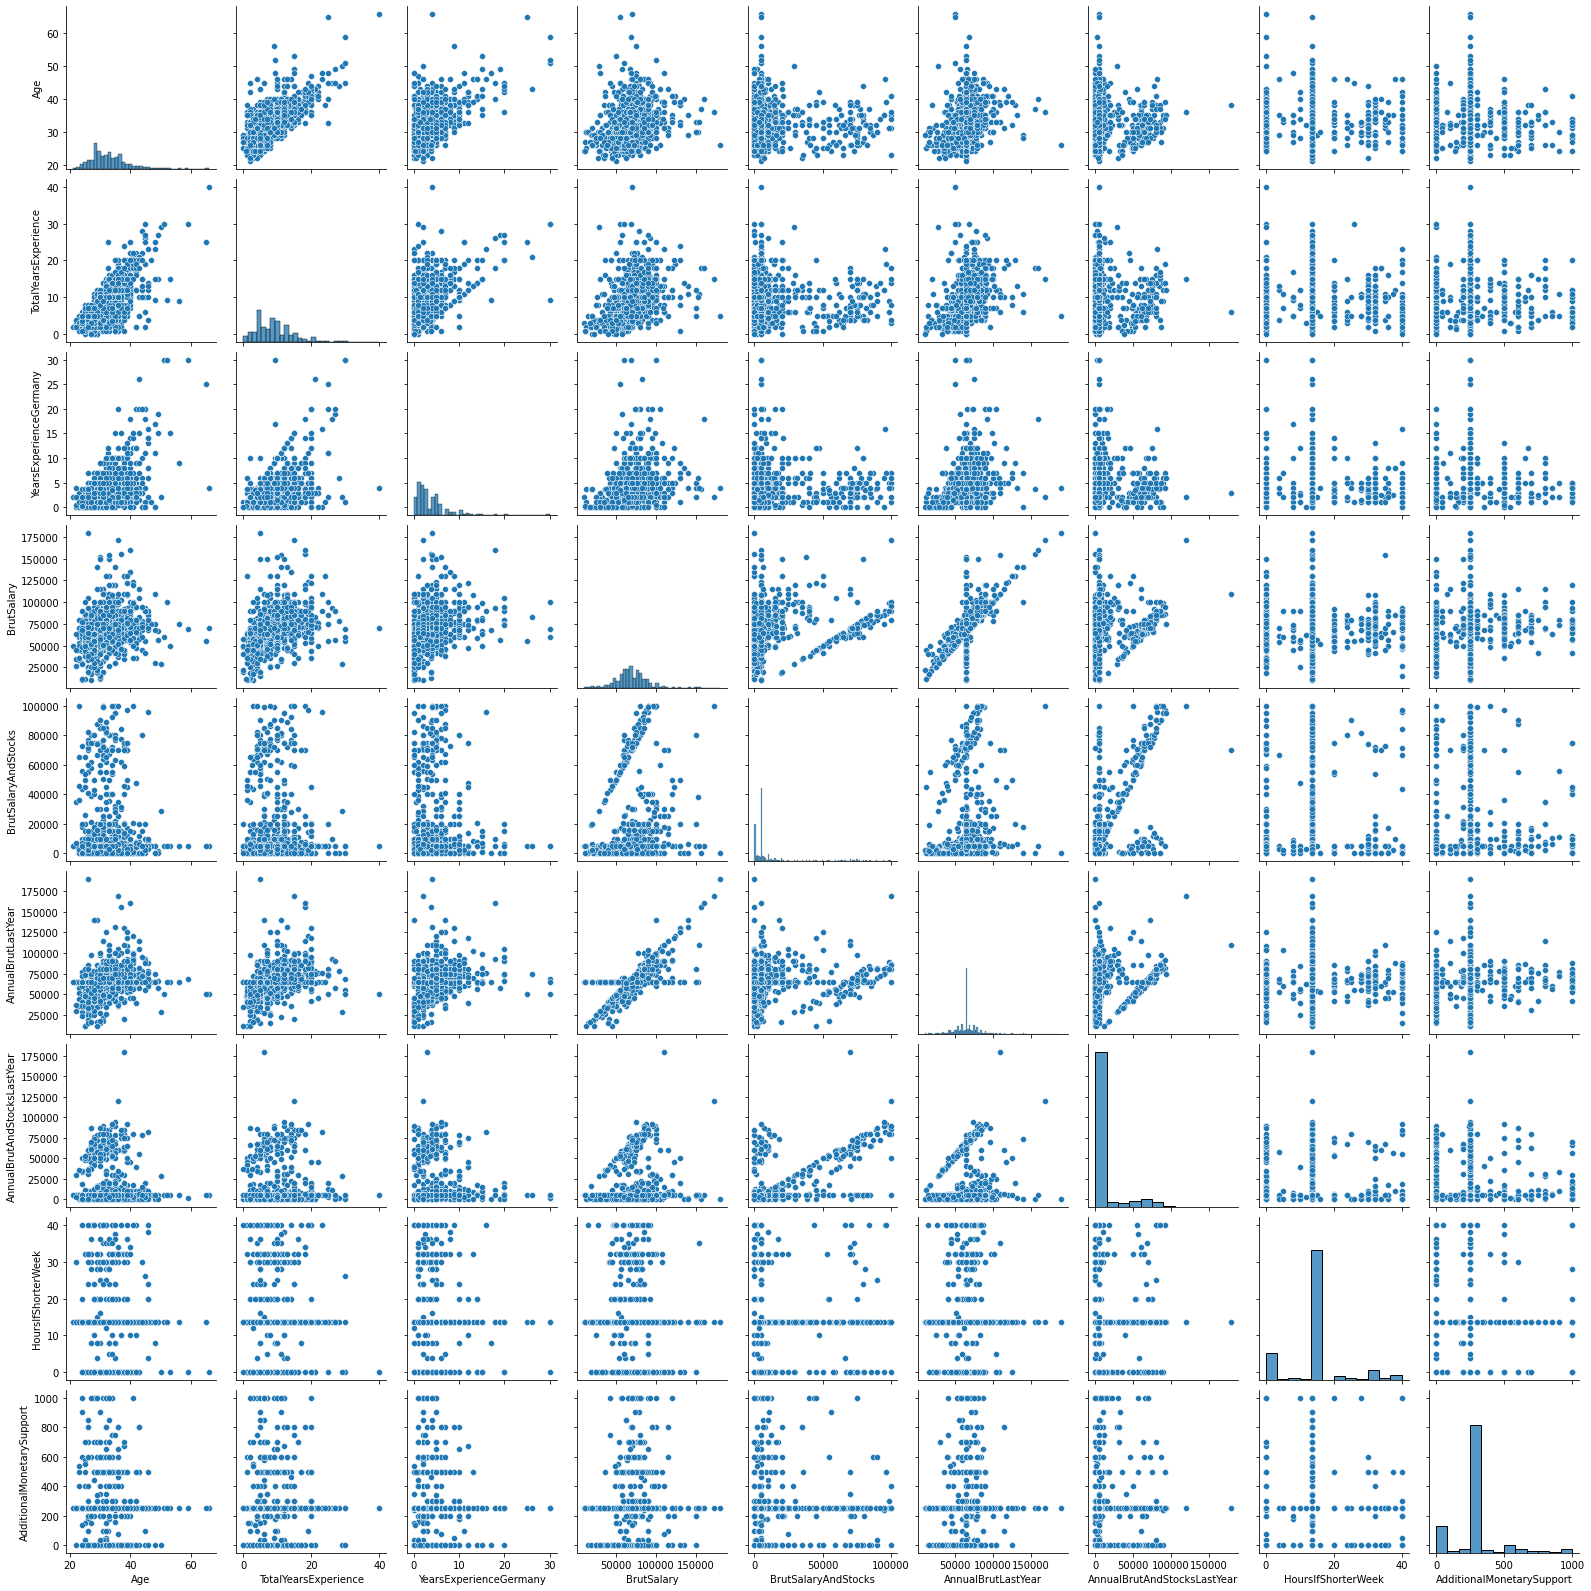

In [91]:
sns.pairplot(data)

In [92]:
# Let's compare by gender
salary_female = data[data['Gender'] == 'Female']['BrutSalary']
salary_male = data[data['Gender'] == 'Male']['BrutSalary']

print("Mean of salaries for women is {}, while for men it is {}.".format(salary_female.mean(),salary_male.mean()))
print("Median of salaries for women is {}, while for men it is {}.".format(salary_female.median(),salary_male.median()))
print("Min of salaries for women is {}, while for men it is {}.".format(salary_female.min(),salary_male.min()))
print("Max of salaries for women is {}, while for men it is {}.".format(salary_female.max(),salary_male.max()))

Mean of salaries for women is 59518.24503311258, while for men it is 71218.8670212766.
Median of salaries for women is 60000.0, while for men it is 70000.0.
Min of salaries for women is 12000.0, while for men it is 10164.0.
Max of salaries for women is 108000.0, while for men it is 180000.0.


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Brut Salary for Female IT Workers')

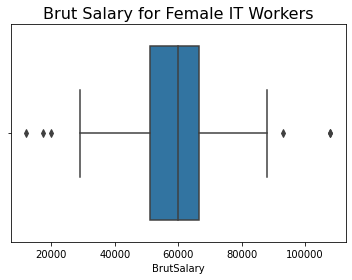

In [93]:
p = sns.boxplot(salary_female)
p.set_title('Brut Salary for Female IT Workers', fontsize= 16)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Brut Salary for Male IT Workers')

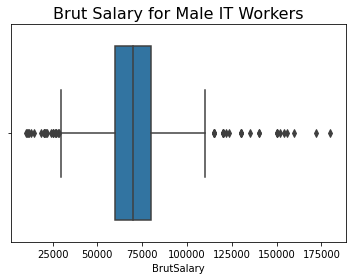

In [94]:
p = sns.boxplot(salary_male)
p.set_title('Brut Salary for Male IT Workers', fontsize= 16)

In [95]:
# Stats for non numerical variables
data.describe(include='object')

Gender           Position Seniority MainSkill          SecondarySkills  \
count    1092               1091      1084       989                      970   
unique      3                128        17       228                      517   
top      Male  Software Engineer    Senior      Java  Javascript / Typescript   
freq      940                345       515       166                       39   

       VacationDays          Employment    ContractDuration CompanySize  \
count          1042                1081                1073        1079   
unique           39                   9                   2           5   
top              30  Full-time employee  Unlimited contract       1000+   
freq            439                1049                1020         392   

       CompanyType LossOfJobCorona  
count         1073            1077  
unique          55               7  
top        Product              No  
freq           666            1025

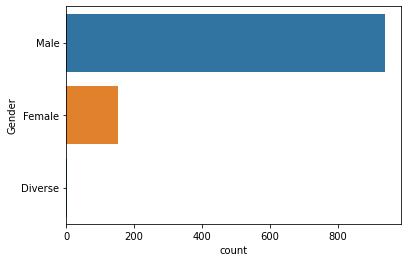

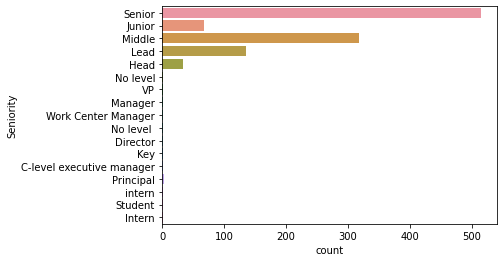

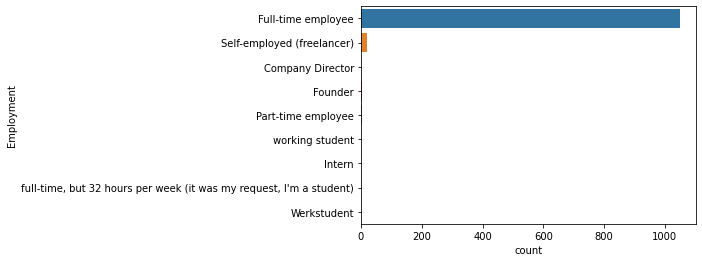

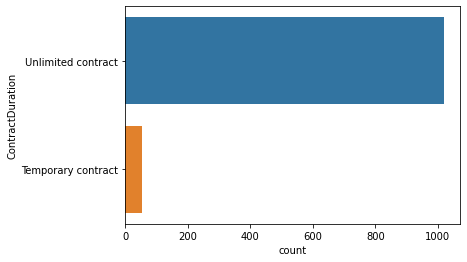

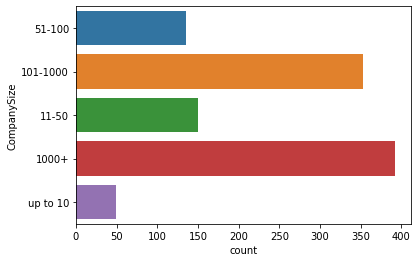

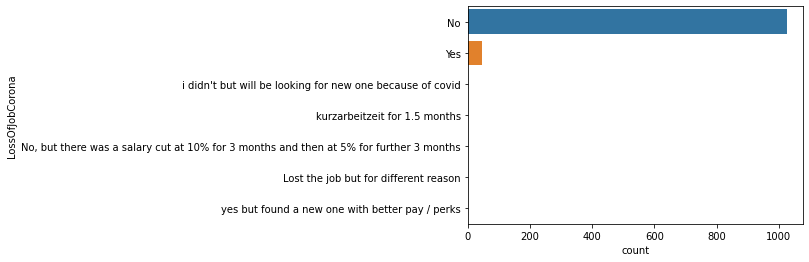

In [96]:
for column in data.select_dtypes(include='object'):
    if data[column].nunique() < 20:
        sns.countplot(y=column, data=data)
        plt.show()

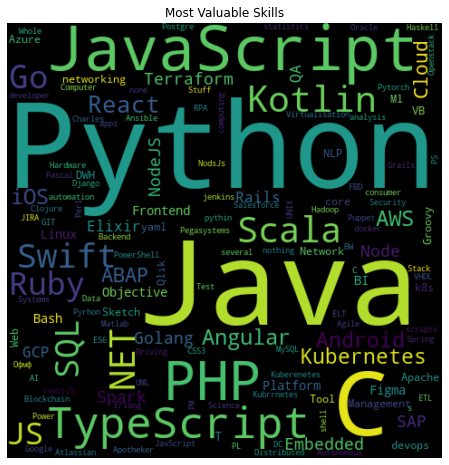

In [97]:
# What are the most valuable skills?
from wordcloud import WordCloud

data_test = data.sort_values('BrutSalary')
best_skills = data_test['MainSkill'].tolist()

best_skills = ",".join([x for x in best_skills if type(x) == str])


# Create the wordcloud object
wordcloud = WordCloud(width=480, height=480, margin=0).generate(best_skills)
 
# Display the generated image:
plt.figure(figsize=(14, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.title('Most Valuable Skills')
plt.show()

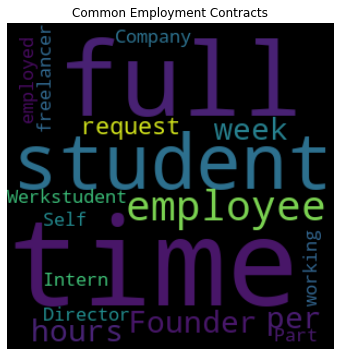

In [98]:
# Most common contract?
contract = set(data_test['Employment'].tolist())

contract = ",".join([x for x in contract if type(x) == str])

# Create the wordcloud object
wordcloud = WordCloud(width=300, height=300, margin=0).generate(contract)
 
# Display the generated image:
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.title('Common Employment Contracts')
plt.show()

In [99]:
contract

"Founder,full-time, but 32 hours per week (it was my request, I'm a student),Werkstudent,Self-employed (freelancer),Company Director,Full-time employee,working student,Part-time employee,Intern"

In [100]:
data.select_dtypes(include='object')

Gender                                Position Seniority  \
0      Male                       Software Engineer    Senior   
1      Male                       Backend Developer    Senior   
2      Male                      Frontend Developer    Junior   
3      Male                       Backend Developer    Senior   
4      Male                                  DevOps    Senior   
...     ...                                     ...       ...   
1096   Male                       Backend Developer    Senior   
1097   Male  Researcher/ Consumer Insights Analyst     Senior   
1098   Male                   IT Operations Manager      Lead   
1099   Male                      Frontend Developer    Middle   
1100   Male                                  DevOps    Middle   

                 MainSkill                                    SecondarySkills  \
0               TypeScript                    Kotlin, Javascript / Typescript   
1                     Ruby                                                NaN   
2               Javascript                                                NaN   
3                  C# .NET                             .NET, SQL, AWS, Docker   
4     AWS, GCP, Python,K8s      Python, AWS, Google Cloud, Kubernetes, Docker   
...                    ...                                                ...   
1096                  Java  Python, Javascript / Typescript, Java / Scala,...   
1097     consumer analysis                                                NaN   
1098                   PHP  Python, C/C++, Javascript / Typescript, Java /...   
1099            JavaScript  Javascript / Typescript, Docker, HTML, CSS; Ad...   
1100                  yaml  Python, AWS, Kubernetes, Docker, terraform, an...   

     VacationDays          Employment    ContractDuration CompanySize  \
0              30  Full-time employee  Unlimited contract      51-100   
1              28  Full-time employee  Unlimited contract    101-1000   
2              24  Full-time employee  Unlimited contract      51-100   
3              29  Full-time employee  Unlimited contract    101-1000   
4              30  Full-time employee  Unlimited contract       11-50   
...           ...                 ...                 ...         ...   
1096           26  Full-time employee  Unlimited contract      51-100   
1097   unlimited   Full-time employee  Unlimited contract       1000+   
1098           28  Full-time employee  Unlimited contract    101-1000   
1099           27  Full-time employee  Unlimited contract    101-1000   
1100           30  Full-time employee  Unlimited contract      51-100   

     CompanyType LossOfJobCorona  
0        Product              No  
1        Product              No  
2        Startup              No  
3        Product              No  
4        Startup              No  
...          ...             ...  
1096     Product             Yes  
1097     Product              No  
1098   eCommerce              No  
1099     Product              No  
1100     Startup              No  

[1092 rows x 11 columns]

In [101]:
corrs = data.corr()
corrs

Age  TotalYearsExperience  \
Age                          1.000000              0.712778   
TotalYearsExperience         0.712778              1.000000   
YearsExperienceGermany       0.526232              0.464859   
BrutSalary                   0.252740              0.390225   
BrutSalaryAndStocks         -0.012254              0.018138   
AnnualBrutLastYear           0.237812              0.353706   
AnnualBrutAndStocksLastYear  0.028167              0.036577   
HoursIfShorterWeek          -0.011589             -0.015502   
AdditionalMonetarySupport   -0.020723              0.016154   

                             YearsExperienceGermany  BrutSalary  \
Age                                        0.526232    0.252740   
TotalYearsExperience                       0.464859    0.390225   
YearsExperienceGermany                     1.000000    0.301418   
BrutSalary                                 0.301418    1.000000   
BrutSalaryAndStocks                        0.052369    0.165622   
AnnualBrutLastYear                         0.255547    0.760808   
AnnualBrutAndStocksLastYear                0.045991    0.149112   
HoursIfShorterWeek                        -0.010272   -0.036793   
AdditionalMonetarySupport                 -0.022444    0.088629   

                             BrutSalaryAndStocks  AnnualBrutLastYear  \
Age                                    -0.012254            0.237812   
TotalYearsExperience                    0.018138            0.353706   
YearsExperienceGermany                  0.052369            0.255547   
BrutSalary                              0.165622            0.760808   
BrutSalaryAndStocks                     1.000000            0.112605   
AnnualBrutLastYear                      0.112605            1.000000   
AnnualBrutAndStocksLastYear             0.684783            0.134755   
HoursIfShorterWeek                      0.006728            0.003967   
AdditionalMonetarySupport               0.026891            0.063486   

                             AnnualBrutAndStocksLastYear  HoursIfShorterWeek  \
Age                                             0.028167           -0.011589   
TotalYearsExperience                            0.036577           -0.015502   
YearsExperienceGermany                          0.045991           -0.010272   
BrutSalary                                      0.149112           -0.036793   
BrutSalaryAndStocks                             0.684783            0.006728   
AnnualBrutLastYear                              0.134755            0.003967   
AnnualBrutAndStocksLastYear                     1.000000            0.009317   
HoursIfShorterWeek                              0.009317            1.000000   
AdditionalMonetarySupport                       0.031212            0.032629   

                             AdditionalMonetarySupport  
Age                                          -0.020723  
TotalYearsExperience                          0.016154  
YearsExperienceGermany                       -0.022444  
BrutSalary                                    0.088629  
BrutSalaryAndStocks                           0.026891  
AnnualBrutLastYear                            0.063486  
AnnualBrutAndStocksLastYear                   0.031212  
HoursIfShorterWeek                            0.032629  
AdditionalMonetarySupport                     1.000000

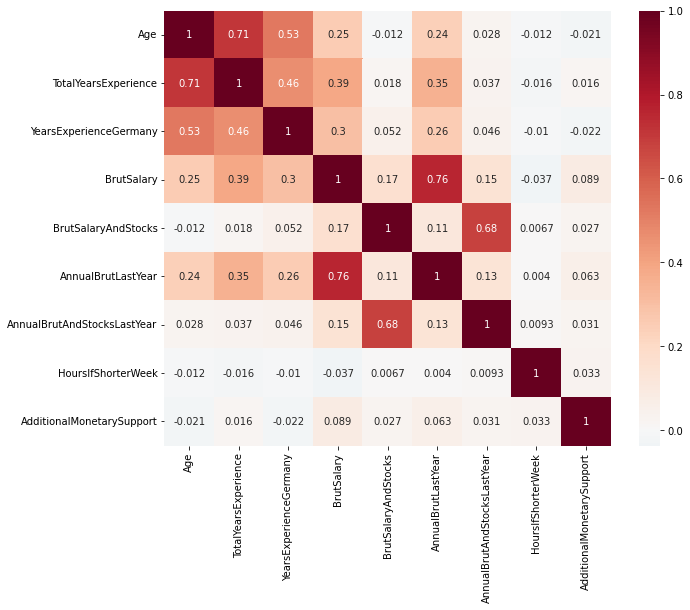

In [102]:
plt.figure(figsize=(10,8))
sns.heatmap(corrs, cmap='RdBu_r', center=0, annot=True)
plt.show()

In [103]:
################### DECISION TREE #########################################################

# Let's see how seniority affects salary; first, convert categorical data to numerical
seniority = list(set(data['Seniority'].values.tolist()))
seniority = [i for i in seniority if i not in["nan", 'No level ', 'C-level executive manager', 'intern', 'key']]
seniority

[nan,
 'No level',
 'Key',
 'Principal',
 'Middle',
 'Head',
 'Lead',
 'Student',
 'Intern',
 'Director',
 'Junior',
 'VP',
 'Manager',
 'Work Center Manager',
 'Senior']

In [104]:
tree_data = data
tree_data.sample()

Age Gender        Position  TotalYearsExperience  \
776  29.0   Male  Data Scientist                   3.0   

     YearsExperienceGermany Seniority MainSkill SecondarySkills  BrutSalary  \
776                     0.0    Middle    Python     Python, SQL     32000.0   

     BrutSalaryAndStocks  AnnualBrutLastYear  AnnualBrutAndStocksLastYear  \
776               6000.0             65000.0                       5000.0   

    VacationDays          Employment    ContractDuration CompanySize  \
776           24  Full-time employee  Unlimited contract       11-50   

    CompanyType LossOfJobCorona  HoursIfShorterWeek  AdditionalMonetarySupport  
776     Startup              No           13.566568                      250.0

In [105]:
# Seniority
cond1 = ((tree_data['Seniority'] == 'Student') |
        (tree_data['Seniority'] == 'Intern')  |
        (tree_data['Seniority'] == 'No level') |
        (tree_data['Seniority'] == 'Junior'))
tree_data.loc[cond1,'Seniority'] = 1

cond2 = ((tree_data['Seniority'] == 'Manager') |
        (tree_data['Seniority'] == 'Lead')  |
        (tree_data['Seniority'] == 'Head') |
        (tree_data['Seniority'] == 'Middle'))
tree_data.loc[cond2,'Seniority'] = 2

cond3 = ((tree_data['Seniority'] == 'Director') |
        (tree_data['Seniority'] == 'Principal')  |
        (tree_data['Seniority'] == 'Senior') |
        (tree_data['Seniority'] == 'VP'))
tree_data.loc[cond3,'Seniority'] = 3

tree_data = tree_data[pd.to_numeric(data['Seniority'], errors='coerce').notnull()]

In [106]:
# Gender
cond1 = ((data['Gender'] == 'Female'))
tree_data.loc[cond1,'Gender'] = 0

cond2 = ((data['Gender'] == 'Male'))
tree_data.loc[cond2,'Gender'] = 1

tree_data = tree_data[pd.to_numeric(tree_data['Gender'], errors='coerce').notnull()]

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [107]:
# EMployment
employment_types = list(set(tree_data['Employment'].values.tolist()))
employment_types


cond0 = ((tree_data['Employment'] == 'Intern'))
tree_data.loc[cond0,'Employment'] = 0

cond1 = ((tree_data['Employment'] == 'working student') |
         (tree_data['Employment'] == 'Werkstudent'))
tree_data.loc[cond1,'Employment'] = 1

cond2 = ((tree_data['Employment'] == 'Self-employed (freelancer)'))
tree_data.loc[cond2,'Employment'] = 2


cond3 = ((tree_data['Employment'] == 'Part-time employee'))
tree_data.loc[cond3,'Employment'] = 3


cond4 = ((tree_data['Employment'] == "full-time, but 32 hours per week (it was my request, I'm a student)") |
         (tree_data['Employment'] == "Full-time employee"))
tree_data.loc[cond4,'Employment'] = 4

cond5 = ((tree_data['Employment'] == "Founder"))
tree_data.loc[cond2,'Employment'] = 5

tree_data = tree_data[pd.to_numeric(tree_data['Employment'], errors='coerce').notnull()]

In [108]:
tree_data.sample()

Age Gender    Position  TotalYearsExperience  YearsExperienceGermany  \
1058  30.0      1  Consultant                   3.0                     3.0   

     Seniority MainSkill                     SecondarySkills  BrutSalary  \
1058         2      Java  Python, R, SQL, Kubernetes, Docker     58000.0   

      BrutSalaryAndStocks  AnnualBrutLastYear  AnnualBrutAndStocksLastYear  \
1058                  0.0             42000.0                      50000.0   

     VacationDays Employment    ContractDuration CompanySize CompanyType  \
1058           30          4  Unlimited contract    101-1000     Startup   

     LossOfJobCorona  HoursIfShorterWeek  AdditionalMonetarySupport  
1058              No           13.566568                      400.0

well, this could have gone better


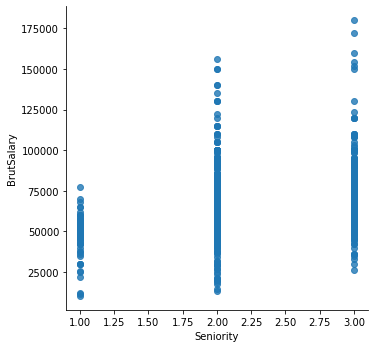

In [109]:
try:
  sns.lmplot(x='Seniority', y = 'BrutSalary',  data=tree_data ,fit_reg=True) 
except:
  print("well, this could have gone better")

In [110]:
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

In [111]:
#split dataset in features and target variable
feature_cols = ['Age', 'Gender', 'TotalYearsExperience', 'Employment']
X = tree_data[feature_cols] # Features
y = tree_data.Seniority # Target variable
y=y.astype('int')

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [112]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.63125


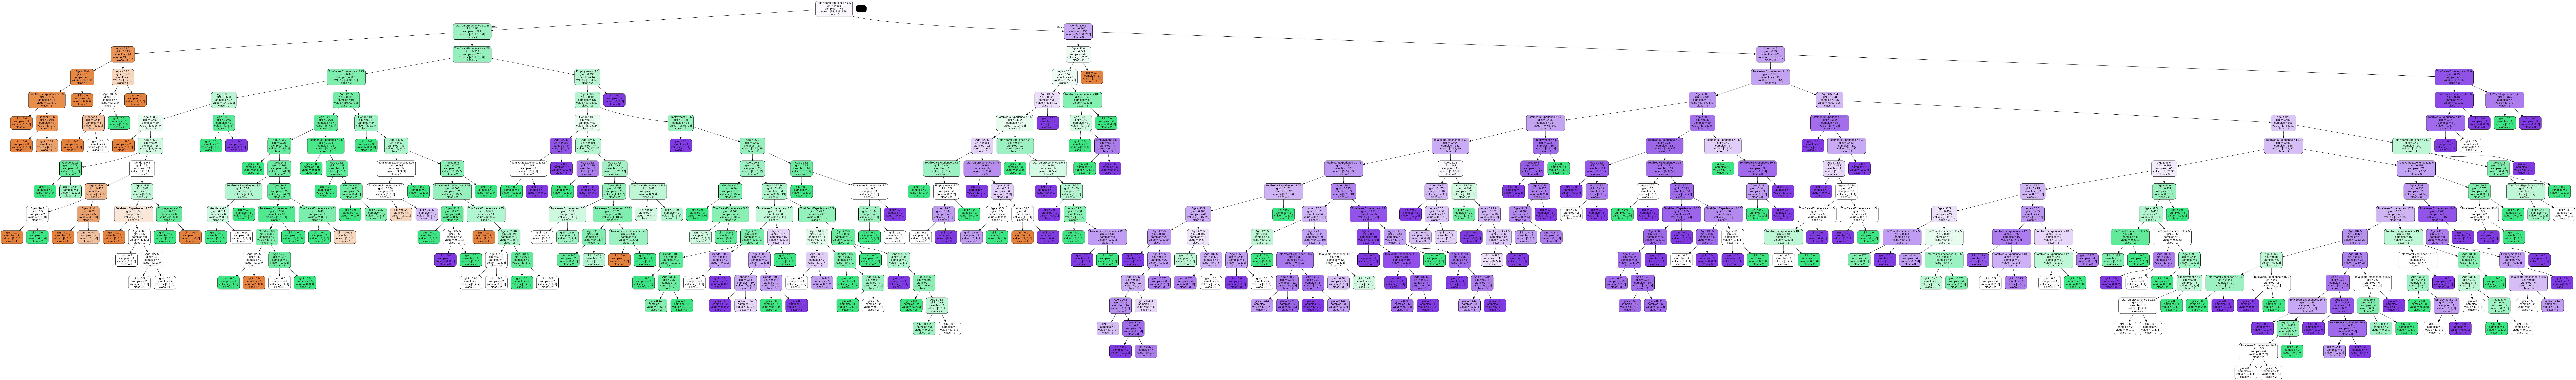

In [113]:
from sklearn.tree import export_graphviz
from six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['1', '2', '3'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('diabetes.png')
Image(graph.create_png())